In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
from PIL import Image


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


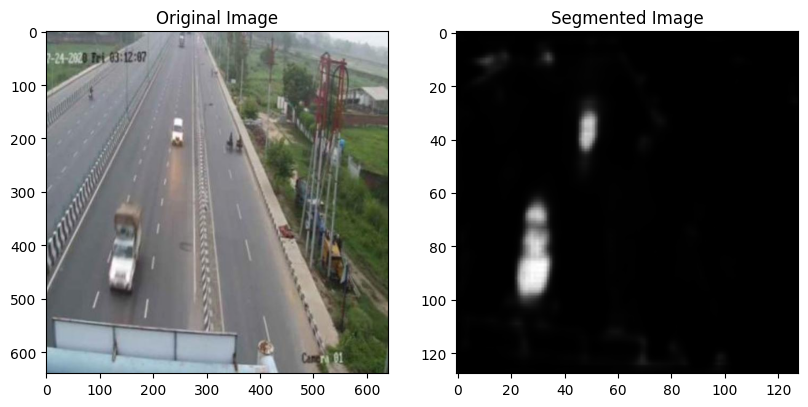

In [17]:
# Memuat model
model = load_model('model/vehicle_model.h5')

# Fungsi untuk memuat dan memproses gambar
def preprocess_image(image_path, target_size):
    image = load_img(image_path, target_size=target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    return image

def display_result(original_image, segmented_image):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(original_image)

    plt.subplot(1, 3, 2)
    plt.title('Segmented Image')
    plt.imshow(segmented_image, cmap='gray')

    plt.show()

# Input gambar baru
image_path = 'test_5.jpg'  # Ganti dengan path gambar Anda
target_size = (128, 128)  # Sesuaikan dengan ukuran input model Anda

# Preprocess gambar
image = preprocess_image(image_path, target_size)

# Prediksi segmentasi
segmented_image = model.predict(image)
segmented_image = segmented_image[0, :, :, 0]

# Memuat gambar asli untuk ditampilkan
original_image = load_img(image_path)
original_image = img_to_array(original_image).astype('uint8')


# Menampilkan hasil
display_result(original_image, segmented_image)

In [3]:
model = load_model('model/vehicle_model.h5')

In [4]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 8, 8, 512) │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 8, 8,      │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 8, 8,      │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 16, 16,    │  2,097,664 │ conv2d_9[0][0]    │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 16,    │          0 │ conv2d_transpose

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


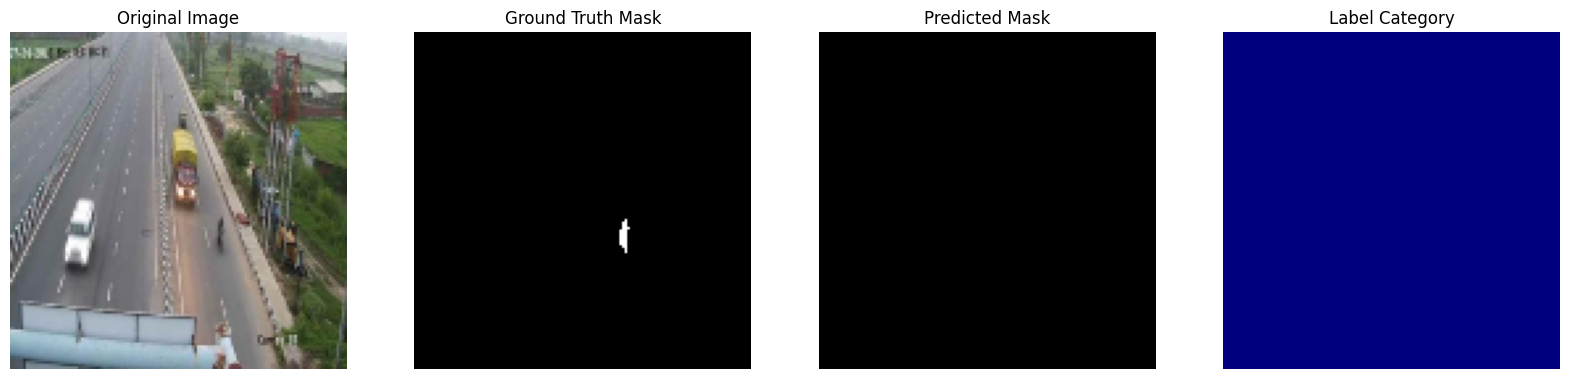

In [20]:
# Function to preprocess the image
def preprocess_image(image_path, target_size):
    image = load_img(image_path, target_size=target_size)
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = image_array / 255.0  # Normalize the image
    return image, image_array

# Function to display images
def display_images(original, ground_truth, predicted, labels):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    axes[0].imshow(original)
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    
    axes[1].imshow(ground_truth, cmap='gray')
    axes[1].set_title("Ground Truth Mask")
    axes[1].axis('off')
    
    axes[2].imshow(predicted, cmap='gray')
    axes[2].set_title("Predicted Mask")
    axes[2].axis('off')
    
    axes[3].imshow(labels, cmap='jet')
    axes[3].set_title("Label Category")
    axes[3].axis('off')
    
    plt.show()

# Function to predict and display the segmentation
def predict_and_display(image_path, ground_truth_path, label_categories):
    original_image, preprocessed_image = preprocess_image(image_path, target_size=(128, 128))  # Adjust target size as needed
    ground_truth_image, _ = preprocess_image(ground_truth_path, target_size=(128, 128))  # Assuming ground truth mask is same size
    
    predicted_mask = model.predict(preprocessed_image)[0]
    predicted_mask = (predicted_mask > 0.5).astype(np.uint8)  # Binarize prediction

    # Generate label categories for visualization
    label_image = np.zeros_like(predicted_mask)
    for i, label in enumerate(label_categories):
        label_image[predicted_mask == i] = label

    display_images(original_image, ground_truth_image, predicted_mask, label_image)

# Example usage
image_path = 'test_ori.jpg'
ground_truth_path = 'test_mask.png'
label_categories = [0, 1, 2, 3]  # Adjust as needed

predict_and_display(image_path, ground_truth_path, label_categories)